In [35]:
# Import the libraries we'll use below.
import os 
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns  # for nicer plots
sns.set(style="darkgrid")  # default style

import tensorflow as tf
from tensorflow import keras
from keras import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Import necessary librairies
import gc 
import numpy as np # linear algebra
from numpy import hstack
from numpy import array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [37]:
import importlib
import utilities
importlib.reload(utilities)
from utilities import *

In [38]:
ZD = ZillowData()
properties, housing = ZD.get_data()

c:\Users\grays\OneDrive\Documents\GitHub\laptop-datasci200\207_final_project\Zillow\utilities.py:31: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2016 = pd.read_csv(
c:\Users\grays\OneDrive\Documents\GitHub\laptop-datasci200\207_final_project\Zillow\utilities.py:34: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_2017 = pd.read_csv(


In [39]:
properties

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970429,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5970430,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5970431,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5970432,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
housing

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.004000,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.021800,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.005000,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13


In [41]:
print("Total Properties Shape: {}".format(properties.shape))
print("-"*50)
housing.info()

Total Properties Shape: (5970434, 58)
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   parcelid                      167888 non-null  int64  
 1   logerror                      167888 non-null  float64
 2   transactiondate               167888 non-null  object 
 3   airconditioningtypeid         53788 non-null   float64
 4   architecturalstyletypeid      468 non-null     float64
 5   basementsqft                  93 non-null      float64
 6   bathroomcnt                   167854 non-null  float64
 7   bedroomcnt                    167854 non-null  float64
 8   buildingclasstypeid           31 non-null      float64
 9   buildingqualitytypeid         107173 non-null  float64
 10  calculatedbathnbr             166056 non-null  float64
 11  decktypeid     

In [42]:
# Check for and drop duplicates in training dataset
def check_duplicates(housing): 
    idsUnique = len(housing[['parcelid', 'transactiondate']].value_counts())
    idsTotal = housing.shape[0]
    idsDupli = idsTotal - idsUnique
    print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")
    
def drop_duplicates(housing):
    # Drop all duplicate entries which have the same parcelID and Transaction Date
    print("Dropping all duplicates based on parcelid and transactiondate...")
    return housing.drop_duplicates(subset=['parcelid', 'transactiondate'], keep='last', ignore_index=True) 

In [43]:
# Check for and drop duplicates
check_duplicates(housing)
housing = drop_duplicates(housing)

# Validate 
check_duplicates(housing)

There are 0 duplicate IDs for 167888 total entries
Dropping all duplicates based on parcelid and transactiondate...
There are 0 duplicate IDs for 167888 total entries


In [44]:
y = housing.logerror

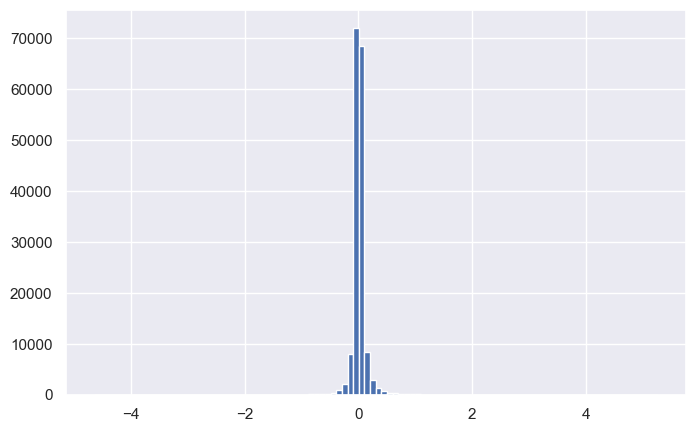

In [45]:
y.hist(bins=100, figsize=(8,5))
plt.show()

C:\Users\grays\AppData\Local\Temp\ipykernel_22572\2046663097.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y , fit=norm)



 mu = 0.01 and sigma = 0.17



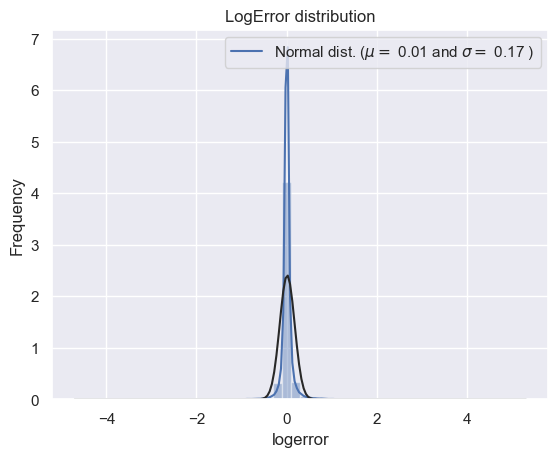

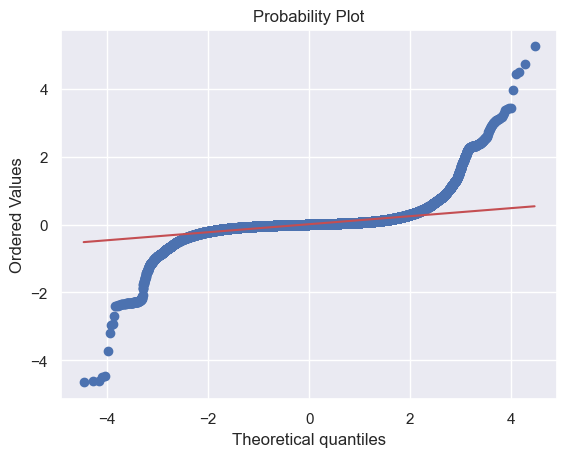

In [46]:
sns.distplot(y , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LogError distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

# drop outliers

In [47]:
highest_thres = y.mean() + 2.5*y.std()
lowest_thres = y.mean() - 2.5*y.std()
print("Highest allowed",highest_thres)
print("Lowest allowed", lowest_thres)

Highest allowed 0.42817114871087447
Lowest allowed -0.4003585363683907


In [48]:
# Only the training set outliers will be dropped (not validation or testing set to ensure model performs well on outliers too)
y = y[y > lowest_thres]
y = y[y < highest_thres]

# Update original Housing dataframe 
housing = housing[housing.logerror > lowest_thres]
housing = housing[housing.logerror < highest_thres]

In [49]:
# Drop rows containing either 75% or more NaN Values
percent = 75.0 
min_count =  int(((100-percent)/100)*housing.shape[1] + 1)
housing = housing.dropna(axis=0, thresh=min_count)
housing.shape

(164538, 60)

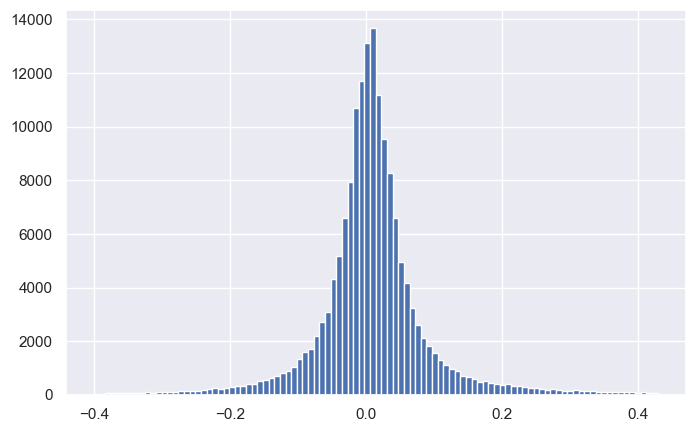

In [50]:
y.hist(bins=100, figsize=(8,5))
plt.show()

C:\Users\grays\AppData\Local\Temp\ipykernel_22572\2477979544.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y , fit=norm)



 mu = 0.01 and sigma = 0.08



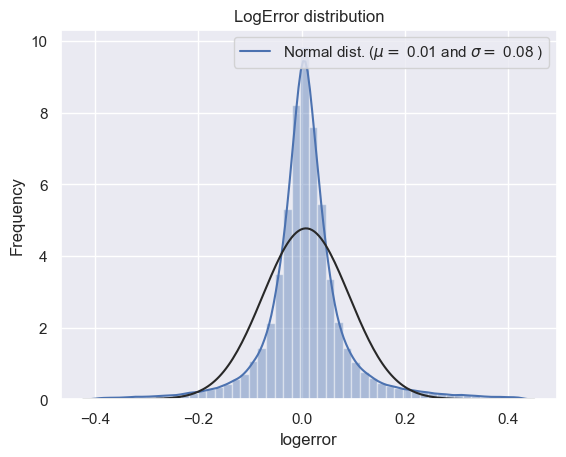

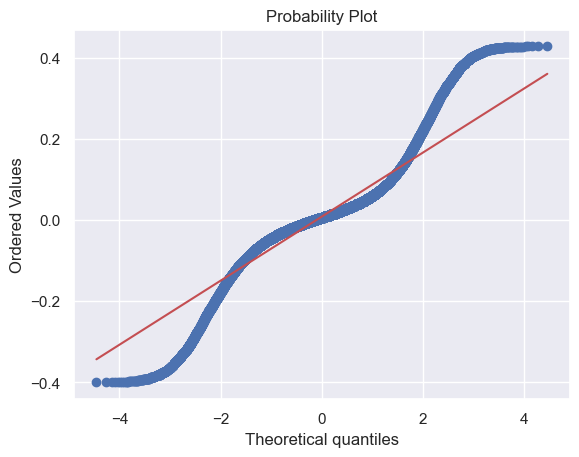

In [51]:
#Check the new distribution 
sns.distplot(y , fit=norm)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('LogError distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()

In [52]:
from sklearn.model_selection import train_test_split 
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    
    train_set = data.loc[~in_test_set]
    test_set = data.loc[in_test_set]
    
    X_train = train_set.drop("logerror", axis=1)
    y_train = train_set["logerror"].copy()
    X_test = test_set.drop("logerror", axis=1)
    y_test = test_set["logerror"].copy()
    return X_train, X_test, y_train, y_test

X_other, X_test, y_other, y_test = split_train_test_by_id(housing, 0.1, "parcelid")
print(f"Other Dataset Shape: {X_other.shape}; Test Dataset Shape: {X_test.shape}")

Other Dataset Shape: (148111, 59); Test Dataset Shape: (16427, 59)


In [53]:
# Split X_other into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, train_size=0.9, random_state=42)
print(f"Training Dataset Shape: {X_train.shape}")    # 81% of instances are in training 
print(f"Test Dataset Shape: {X_test.shape}")         # 10% of instances are in test 
print(f"Validation Dataset Shape: {X_val.shape}")    # 9% of instances are in validation

Training Dataset Shape: (133299, 59)
Test Dataset Shape: (16427, 59)
Validation Dataset Shape: (14812, 59)


# Data preprocessing

In [54]:
feature_na_ratio = (X_train.isnull().sum() / len(X_train)) * 100
feature_na_ratio = feature_na_ratio.drop(feature_na_ratio[feature_na_ratio == 0].index).sort_values(ascending=False)
feature_na_ratio_df = pd.DataFrame({'Missing Ratio' : feature_na_ratio})
feature_na_ratio_df

,Missing Ratio
buildingclasstypeid,99.985746
finishedsquarefeet13,99.959490
basementsqft,99.942985
storytypeid,99.942985
yardbuildingsqft26,99.903225
fireplaceflag,99.771191
architecturalstyletypeid,99.723179
typeconstructiontypeid,99.690920
finishedsquarefeet6,99.544633
decktypeid,99.258809


In [55]:
feature_na_ratio_df[feature_na_ratio_df['Missing Ratio'] < 15]

,Missing Ratio
lotsizesquarefeet,11.060848
finishedsquarefeet12,4.810239
regionidcity,1.955754
fullbathcnt,0.992506
calculatedbathnbr,0.992506
yearbuilt,0.573148
censustractandblock,0.491377
calculatedfinishedsquarefeet,0.481624
structuretaxvaluedollarcnt,0.279072
regionidzip,0.042761


In [56]:
print ("Features with one unique value!!")
exclude_unique = []
for c in X_train.columns:
    num_uniques = len(X_train[c].unique())
    if X_train[c].isnull().sum() != 0:
        num_uniques -= 1
    if num_uniques == 1:
        exclude_unique.append(c)
print(exclude_unique)

Features with one unique value!!
['decktypeid', 'hashottuborspa', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'storytypeid', 'fireplaceflag', 'taxdelinquencyflag']


### Drop features
- `finishedsquarefeet13`: Data description says 'Perimeter Living Area'. Over 99% of the dataset is missing values.
- `finishedsquarefeet15`: Data description says 'Total area'. Over 96% of the dataset is missing values.
- `finishedfloor1squarefeet`: Over 92% of the dataset is missing values.
- `finishedsquarefeet50`: Over 92% of the dataset is missing values.
- `storytypeid`: Data description states 35 possible values for the Story Type. Over 99% of the dataset is missing values.
- `buildingclasstypeid`: With over 99.8% of the dataset missing, imputing won't contribute any new information.
- `architecturalstyletypeid`: Data description states 27 possible values. Over 99% of the dataset is missing values.
- `typeconstructiontypeid`: Data description states 18 possible values. Over 99% of the dataset is missing values.
- `finishedsquarefeet6`: Data description states 'Base unfinished and finished area'. However, with over 99% of data missing, feature is dropped.
- `numberofstories`: With over 77% of the missing values and no one value dominating the variable distribution, it is impractical to impute and introduce incorrect information.
- `rawcensustractandblock`, `censustractandblock`: With almost 58k unique values, these features are being dropped until further research can be done into incorporating information from them in the model algorithm.
- `assessmentyear`: Dropping as the variable has only one unique value in the dataset.
- `parcelid`, `transactiondate`: This variable is not available when trying to predict target variable logerror
`basementsqft`, `yardbuildingsqft26`: Dropping due to over 96% of data missing.

### Duplciate features
- `pooltypeid10`, `hashottuborspa`: Duplicate information is present in `pooltypeid2` feature.
- `pooltypeid7`: Data description states 'Pool without Hot Tub', duplicate information is present in `pooltypeid2` feature which is boolean for 'Pool with Spa/Hot Tub'
- `fireplaceflag`: Duplicate information is present in `fireplacecnt` feature with `fireplaceflag` having a higher missing ratio.
- `threequarterbathnbr`, `calculatedbathnbr`, `fullbathcnt`: Duplicate information is present in bathroomcnt which has a lower missing ratio
- `finishedsquarefeet12`: Duplicate information in `calculatedfinishedsquarefeet`.
- `taxvaluedollarcnt`: Duplicate information from the sum of `structuretaxvaluedollarcnt` and `landtaxvaluedollarcnt`
- `roomcnt`: Duplicate information from `bedroomcnt` and `roomcnt` shows inconsistent data with majority of properties having 0 rooms in the principal residence
- `propertyzoningdesc`, `propertycountylandusecode`: `propertylandusetypeid` already provides similar information. In addition, this variable has over 2300 unique values - drastically increasing dataset cardinality.
- `regionidneighborhood`, `regionidzip`, `regionidcity`: With over 60% of the dataset missing values and 500+ unique values, there are better region based features such as `regionidcounty`, `latitude`, `longitude` to obtain this information
- `taxdelinquencyyear`: Given the high proportion of missing data (over 97%) and `taxdelinquencyflag` providing similar information, the information gain from years is low.

In [64]:
cols_to_drop = [
    'parcelid',
    'transactiondate', #
    'finishedsquarefeet13',
    'finishedsquarefeet15',
    'finishedfloor1squarefeet',
    'finishedsquarefeet50',
    'storytypeid',
    'buildingclasstypeid',
    'architecturalstyletypeid',
    'typeconstructiontypeid',
    'finishedsquarefeet6',
    'numberofstories',
    'rawcensustractandblock',
    'censustractandblock',
    'assessmentyear',
    'basementsqft',
    'yardbuildingsqft26',
    # duplcates
    'pooltypeid10',
    'hashottuborspa',
    'pooltypeid7',
    'fireplaceflag',
    'threequarterbathnbr',
    'calculatedbathnbr',
    'fullbathcnt',
    'finishedsquarefeet12',
    'taxvaluedollarcnt',
    'roomcnt',
    'propertyzoningdesc',
    'propertycountylandusecode',
    'propertylandusetypeid',
    'regionidneighborhood',
    'regionidzip',
    'regionidcity',
    'taxdelinquencyyear',
    # single value
    # 'decktypeid',
    # 'hashottuborspa',
    # 'poolcnt',
    # 'pooltypeid10',
    # 'pooltypeid2',
    # 'pooltypeid7',
    # 'storytypeid',
    # 'fireplaceflag',
    # 'taxdelinquencyflag',
]

In [65]:
X_train_reduced = X_train.drop(cols_to_drop, axis=1)
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133299 entries, 101543 to 138263
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   airconditioningtypeid         42899 non-null   float64
 1   bathroomcnt                   133299 non-null  float64
 2   bedroomcnt                    133299 non-null  float64
 3   buildingqualitytypeid         85025 non-null   float64
 4   decktypeid                    988 non-null     float64
 5   calculatedfinishedsquarefeet  132657 non-null  float64
 6   fips                          133299 non-null  float64
 7   fireplacecnt                  14198 non-null   float64
 8   garagecarcnt                  44277 non-null   float64
 9   garagetotalsqft               44277 non-null   float64
 10  heatingorsystemtypeid         83964 non-null   float64
 11  latitude                      133299 non-null  float64
 12  longitude                     133299 no

In [66]:
reduced_feature_na_ratio = (X_train_reduced.isnull().sum() / len(X_train_reduced)) * 100
reduced_feature_na_ratio = reduced_feature_na_ratio.drop(reduced_feature_na_ratio[reduced_feature_na_ratio == 0].index).sort_values(ascending=False)
reduced_feature_na_ratio_df = pd.DataFrame({'Missing Ratio' : reduced_feature_na_ratio})
reduced_feature_na_ratio_df

,Missing Ratio
decktypeid,99.258809
poolsizesum,98.882962
pooltypeid2,98.639150
taxdelinquencyflag,97.301555
yardbuildingsqft17,96.977472
fireplacecnt,89.348757
poolcnt,79.543733
airconditioningtypeid,67.817463
garagetotalsqft,66.783697
garagecarcnt,66.783697


C:\Users\grays\AppData\Local\Temp\ipykernel_22572\1293813859.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = X_train_reduced.corr()


<Axes: >

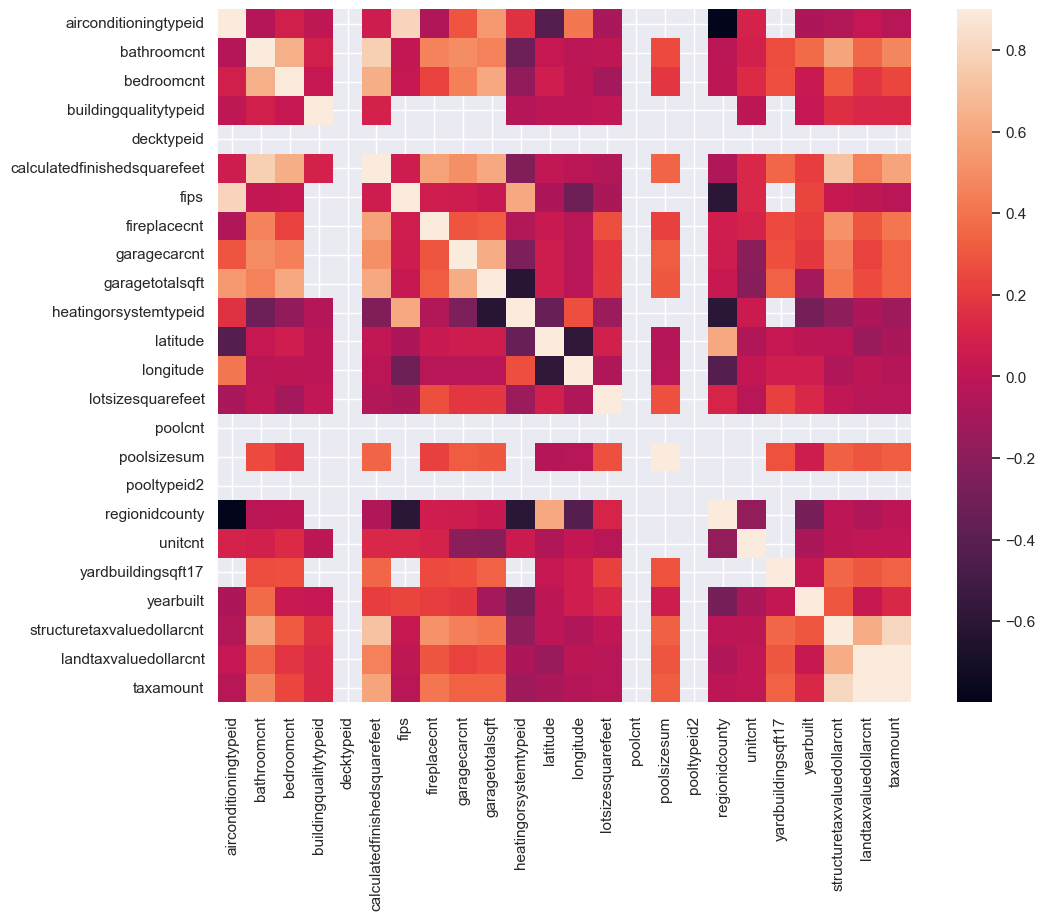

In [67]:
#Correlation map to see how features are correlated with SalePrice
corrmat = X_train_reduced.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [68]:
X_train_reduced = X_train_reduced.drop(['taxamount'], axis=1)
X_train_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133299 entries, 101543 to 138263
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   airconditioningtypeid         42899 non-null   float64
 1   bathroomcnt                   133299 non-null  float64
 2   bedroomcnt                    133299 non-null  float64
 3   buildingqualitytypeid         85025 non-null   float64
 4   decktypeid                    988 non-null     float64
 5   calculatedfinishedsquarefeet  132657 non-null  float64
 6   fips                          133299 non-null  float64
 7   fireplacecnt                  14198 non-null   float64
 8   garagecarcnt                  44277 non-null   float64
 9   garagetotalsqft               44277 non-null   float64
 10  heatingorsystemtypeid         83964 non-null   float64
 11  latitude                      133299 non-null  float64
 12  longitude                     133299 no